In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import xgi
from governance import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cProfile

In [9]:
num_decisions = 6
num_people = 10000

select_decision_type = "snowball"
select_group_type = "star"
make_decision_type = "average"
update_opinions_type = "star"

# opinions = create_opinions(num_people, num_decisions)
opinions = create_polarized_opinions(
    num_people, num_decisions, [1, -1, -1, -1, -1, 1], 0.2, 0.2
)
votes = 2 * (np.mean(opinions, axis=0) > 0) - 1
print(votes)
# decision_matrix = create_decision_matrix(num_decisions)
decision_matrix = np.array(
    [
        [0, -1, -1, -1, -1, 1],
        [-1, 0, 0, 0, 0, 0],
        [-1, 0, 0, 0, 0, 0],
        [-1, 0, 0, 0, 0, 0],
        [-1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
    ]
)
print(decision_matrix)

[-1  1  1  1  1 -1]
[[ 0 -1 -1 -1 -1  1]
 [-1  0  0  0  0  0]
 [-1  0  0  0  0  0]
 [-1  0  0  0  0  0]
 [-1  0  0  0  0  0]
 [ 1  0  0  0  0  0]]


In [10]:
group_size = 51
overlap = 6

# opinions = create_opinions(num_people, num_decisions)
opinions = create_polarized_opinions(
    num_people, num_decisions, [1, -1, -1, -1, -1, 1], 0.33, 0.6
)
cProfile.run(
    "decision_process(opinions, decision_matrix, group_size, overlap, select_decision_type=select_decision_type, select_group_type=select_group_type, make_decision_type=make_decision_type, update_opinions_type=update_opinions_type)"
)

         4471 function calls in 0.003 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       11    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(size)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(sum)
       27    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(where)
        1    0.000    0.000    0.003    0.003 <string>:1(<module>)
        6    0.000    0.000    0.000    0.000 _collections_abc.py:627(__and__)
       11    0.000    0.000    0.000    0.000 _collections_abc.py:630(<genexpr>)
       18    0.000    0.000    0.000    0.000 abc.py:117(__instancecheck__)
        6    0.000    0.000    0.000    0.000 fromnumeric.py:2183(_sum_dispatcher)
        6    0.000    0.000    0.000    0.000 fromnumeric.py:2188(sum)
       11    0.000    0.000    0.000    0.000 fromnumeric.py:3190(_size_dispatcher)
       11    0.000    0.000    0.000    0.000 fro

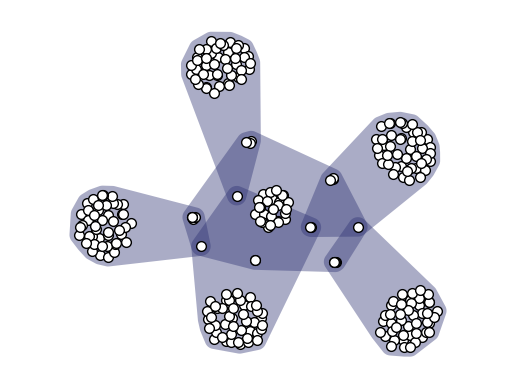

In [22]:
group_size = 51
overlap = 6

# opinions = create_opinions(num_people, num_decisions)
opinions = create_polarized_opinions(
    num_people, num_decisions, [1, -1, -1, -1, -1, 1], 0.33, 0.6
)
decisions, final_opinions, decision_groups = decision_process(
    opinions,
    decision_matrix,
    group_size,
    overlap,
    select_decision_type=select_decision_type,
    select_group_type=select_group_type,
    make_decision_type=make_decision_type,
    update_opinions_type=update_opinions_type,
)
# d = decisions_to_array(decisions)
H = decision_groups
coherence = 0
for d1, d2 in np.ndindex(decision_matrix.shape):
    coherence += decision_matrix[d1, d2] * decisions[d1] * decisions[d2]

fig = matplotlib.pyplot.figure()
xgi.draw(H, xgi.pairwise_spring_layout(H), node_size=7, hull=True, radius=0.05)

fig.savefig("Figures/example_hypergraph.pdf", dpi=1000)
fig.savefig("Figures/example_hypergraph.png", dpi=1000)

In [6]:
num_samples = 500
group_sizes = np.arange(1, 51, 2, dtype=int)
satisfaction_group_size = np.zeros(len(group_sizes))
satisfiability_group_size = np.zeros(len(group_sizes))
overlap = 0
H_group_sizes = dict()

for i in range(len(group_sizes)):
    g = group_sizes[i]
    for j in range(num_samples):
        if j % 100 == 0:
            print(i / len(group_sizes), j / num_samples)
        opinions = create_random_opinions(num_people, num_decisions)
        # opinions = create_polarized_opinions(num_people, num_decisions,[1,-1,-1,-1,-1,1],0.33,0.6)
        # opinions = create_mixed_opinions(num_people, num_decisions,[0.6,-0.4,-0.4,-0.4,-0.4,0.6],0.0,0.6)
        # binary_votes = 2*(np.mean(opinions, axis=0)>0)-1
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            g,
            overlap,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        # H_group_sizes[(g, overlap, j)] = decision_groups
        d = decisions_to_array(decisions)
        # satisfaction_group_size[i] += np.mean(opinions.dot(d))/num_samples
        satisfaction_group_size[i] += votes.dot(d) / num_samples
        for d1, d2 in np.ndindex(decision_matrix.shape):
            satisfiability_group_size[i] += (
                decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / num_samples
            )

0.0 0.0
0.0 0.2
0.0 0.4
0.0 0.6
0.0 0.8
0.04 0.0
0.04 0.2
0.04 0.4
0.04 0.6
0.04 0.8
0.08 0.0
0.08 0.2
0.08 0.4
0.08 0.6
0.08 0.8
0.12 0.0
0.12 0.2
0.12 0.4
0.12 0.6
0.12 0.8
0.16 0.0
0.16 0.2
0.16 0.4
0.16 0.6
0.16 0.8
0.2 0.0
0.2 0.2
0.2 0.4
0.2 0.6
0.2 0.8
0.24 0.0
0.24 0.2
0.24 0.4
0.24 0.6
0.24 0.8
0.28 0.0
0.28 0.2
0.28 0.4
0.28 0.6
0.28 0.8
0.32 0.0
0.32 0.2
0.32 0.4
0.32 0.6
0.32 0.8
0.36 0.0
0.36 0.2
0.36 0.4
0.36 0.6
0.36 0.8
0.4 0.0
0.4 0.2
0.4 0.4
0.4 0.6
0.4 0.8
0.44 0.0
0.44 0.2
0.44 0.4
0.44 0.6
0.44 0.8
0.48 0.0
0.48 0.2
0.48 0.4
0.48 0.6
0.48 0.8
0.52 0.0
0.52 0.2
0.52 0.4
0.52 0.6
0.52 0.8
0.56 0.0
0.56 0.2
0.56 0.4
0.56 0.6
0.56 0.8
0.6 0.0
0.6 0.2
0.6 0.4
0.6 0.6
0.6 0.8
0.64 0.0
0.64 0.2
0.64 0.4
0.64 0.6
0.64 0.8
0.68 0.0
0.68 0.2
0.68 0.4
0.68 0.6
0.68 0.8
0.72 0.0
0.72 0.2
0.72 0.4
0.72 0.6
0.72 0.8
0.76 0.0
0.76 0.2
0.76 0.4
0.76 0.6
0.76 0.8
0.8 0.0
0.8 0.2
0.8 0.4
0.8 0.6
0.8 0.8
0.84 0.0
0.84 0.2
0.84 0.4
0.84 0.6
0.84 0.8
0.88 0.0
0.88 0.2
0.88 0.4
0.88 0.6

In [7]:
num_samples = 500
overlap_sizes = np.arange(0, 21, 1, dtype=int)
satisfaction_overlap_size = np.zeros(len(overlap_sizes))
satisfiability_overlap_size = np.zeros(len(overlap_sizes))
group_size = 50  # max(overlap_sizes) + 1

H_overlap_sizes = dict()

for i in range(len(overlap_sizes)):
    o = overlap_sizes[i]
    for j in range(num_samples):
        if j % 100 == 0:
            print(i / len(overlap_sizes), j / num_samples)
        opinions = create_random_opinions(num_people, num_decisions)
        # opinions = create_polarized_opinions(num_people, num_decisions,[1,-1,-1,-1,-1,1],0.33,0.6)
        # opinions = create_mixed_opinions(num_people, num_decisions,[0.6,-0.4,-0.4,-0.4,-0.4,0.6],0.0,0.6)
        # binary_votes = 2*(np.mean(opinions, axis=0)>0)-1
        votes = np.mean(opinions, axis=0)
        decisions, final_opinions, decision_groups = decision_process(
            opinions,
            decision_matrix,
            group_size,
            o,
            select_decision_type=select_decision_type,
            select_group_type=select_group_type,
            make_decision_type=make_decision_type,
            update_opinions_type=update_opinions_type,
        )
        H_overlap_sizes[(group_size, o, j)] = decision_groups
        d = decisions_to_array(decisions)
        # satisfaction_overlap_size[i] += np.mean(opinions.dot(d))/num_samples
        satisfaction_overlap_size[i] += votes.dot(d) / num_samples
        for d1, d2 in np.ndindex(decision_matrix.shape):
            satisfiability_overlap_size[i] += (
                decision_matrix[d1, d2] * decisions[d1] * decisions[d2] / num_samples
            )

0.0 0.0
0.0 0.2
0.0 0.4
0.0 0.6
0.0 0.8
0.047619047619047616 0.0
0.047619047619047616 0.2
0.047619047619047616 0.4
0.047619047619047616 0.6
0.047619047619047616 0.8
0.09523809523809523 0.0
0.09523809523809523 0.2
0.09523809523809523 0.4
0.09523809523809523 0.6
0.09523809523809523 0.8
0.14285714285714285 0.0
0.14285714285714285 0.2
0.14285714285714285 0.4
0.14285714285714285 0.6
0.14285714285714285 0.8
0.19047619047619047 0.0
0.19047619047619047 0.2
0.19047619047619047 0.4
0.19047619047619047 0.6
0.19047619047619047 0.8
0.23809523809523808 0.0
0.23809523809523808 0.2
0.23809523809523808 0.4
0.23809523809523808 0.6
0.23809523809523808 0.8
0.2857142857142857 0.0
0.2857142857142857 0.2
0.2857142857142857 0.4
0.2857142857142857 0.6
0.2857142857142857 0.8
0.3333333333333333 0.0
0.3333333333333333 0.2
0.3333333333333333 0.4
0.3333333333333333 0.6
0.3333333333333333 0.8
0.38095238095238093 0.0
0.38095238095238093 0.2
0.38095238095238093 0.4
0.38095238095238093 0.6
0.38095238095238093 0.8
0.428

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(group_sizes, satisfaction_group_size, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average satisfaction")
plt.xlabel("Group size")
sns.despine()

plt.subplot(212)
plt.plot(overlap_sizes, satisfaction_overlap_size, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average satisfaction")
plt.xlabel("Overlap size")
plt.tight_layout()
sns.despine()


plt.savefig("Figures/democratic.pdf")
plt.show()

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(group_sizes, satisfiability_group_size, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average coherence")
plt.xlabel("Group size")
plt.subplot(212)
plt.plot(overlap_sizes, satisfiability_overlap_size, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average coherence")
plt.xlabel("Overlap size")
plt.tight_layout()
plt.savefig("Figures/coherence.pdf", dpi=1000)
plt.savefig("Figures/coherence.png", dpi=1000)
plt.show()

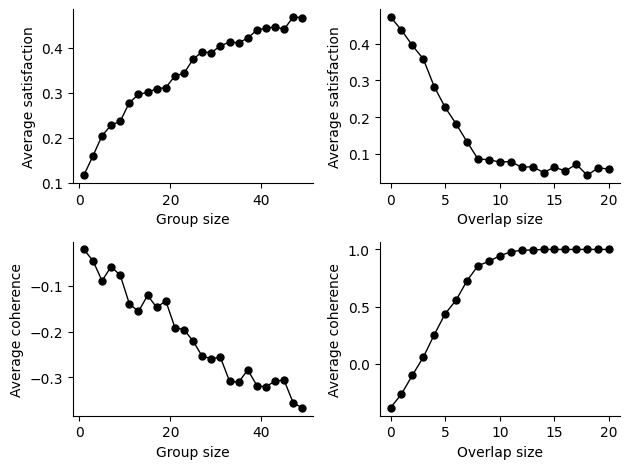

In [20]:
plt.figure()
plt.subplot(221)
plt.plot(group_sizes, satisfaction_group_size, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average satisfaction")
plt.xlabel("Group size")
sns.despine()

plt.subplot(222)
plt.plot(overlap_sizes, satisfaction_overlap_size, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average satisfaction")
plt.xlabel("Overlap size")
sns.despine()

plt.subplot(223)
plt.plot(group_sizes, satisfiability_group_size / 10, "ko-", linewidth=1, markersize=5)
plt.ylabel("Average coherence")
plt.xlabel("Group size")
sns.despine()

plt.subplot(224)
plt.plot(
    overlap_sizes, satisfiability_overlap_size / 10, "ko-", linewidth=1, markersize=5
)
plt.ylabel("Average coherence")
plt.xlabel("Overlap size")
sns.despine()

plt.tight_layout()
plt.savefig("Figures/complete.pdf", dpi=1000)
plt.savefig("Figures/complete.png", dpi=1000)
plt.show()

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2ef6e5360>,
  <matplotlib.collections.PatchCollection at 0x2ef6e4d90>))

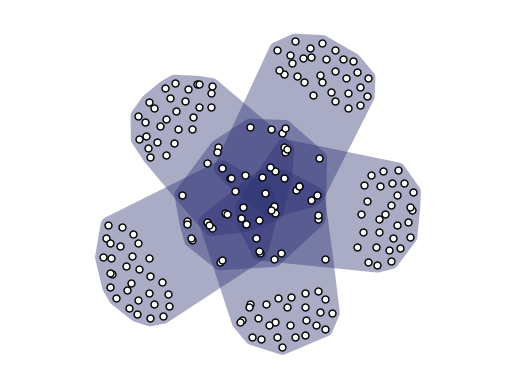

In [19]:
key = (50, 20, 1)
xgi.draw(
    H_overlap_sizes[key],
    xgi.pairwise_spring_layout(H_overlap_sizes[key]),
    node_size=5,
    hull=True,
    radius=0.05,
)

In [15]:
key = (20, 1, 1)
xgi.draw(
    H_group_sizes[key],
    xgi.pairwise_spring_layout(H_group_sizes[key]),
    node_size=5,
    hull=True,
)

KeyError: (20, 1, 1)

## 